<a href="https://colab.research.google.com/github/Fidelisaboke/food-security-analysis/blob/main/food_security_status.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food Security Status

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Import the required libraries

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from scipy.stats import randint
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

## Load the Dataset

In [21]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/dataFS.csv')
data.head()

,ID,site,hhedu,hhhage,hhhsex,hhethnic,hhsize,u05,povline,windex3,windex5,FS_score,FS
0,766,viwandani,primary,18,female,Other,6,1,yes,middle,fourth,0,Secure
1,6540,viwandani,primary,31,male,Other,1,0,yes,lowest,lowest,3,Severely insecure
2,9327,viwandani,primary,45,male,Other,1,0,no_(2),highest,fourth,0,Secure
3,9563,viwandani,secondary,18,male,Other,1,0,no_(2),middle,second,1,Moderately insecure
4,9631,korogocho,secondary,58,male,Other,2,1,no_(2),highest,fourth,0,Secure


## Exploratory Data Analysis (EDA)

### Dataset Information

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10991 entries, 0 to 10990
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        10991 non-null  int64 
 1   site      10991 non-null  object
 2   hhedu     10974 non-null  object
 3   hhhage    10991 non-null  int64 
 4   hhhsex    10991 non-null  object
 5   hhethnic  10991 non-null  object
 6   hhsize    10991 non-null  int64 
 7   u05       10991 non-null  int64 
 8   povline   10991 non-null  object
 9   windex3   10991 non-null  object
 10  windex5   10991 non-null  object
 11  FS_score  10991 non-null  int64 
 12  FS        10991 non-null  object
dtypes: int64(5), object(8)
memory usage: 1.1+ MB


### Dataset Description

In [23]:
data.describe()

,ID,hhhage,hhsize,u05,FS_score
count,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000
mean,9364.528068,38.096443,3.211446,0.424529,1.238741
std,5388.489429,12.295378,2.032014,0.651529,1.217911
min,1.000000,18.000000,1.000000,0.000000,0.000000
25%,4676.500000,29.000000,1.000000,0.000000,0.000000
50%,9376.000000,36.000000,3.000000,0.000000,1.000000
75%,14048.500000,45.000000,4.000000,1.000000,2.000000
max,18704.000000,100.000000,20.000000,5.000000,4.000000


### Checking for Null Values


In [24]:
data.isnull().sum()

,0
ID,0
site,0
hhedu,17
hhhage,0
hhhsex,0
hhethnic,0
hhsize,0
u05,0
povline,0
windex3,0


### Distribution by Site

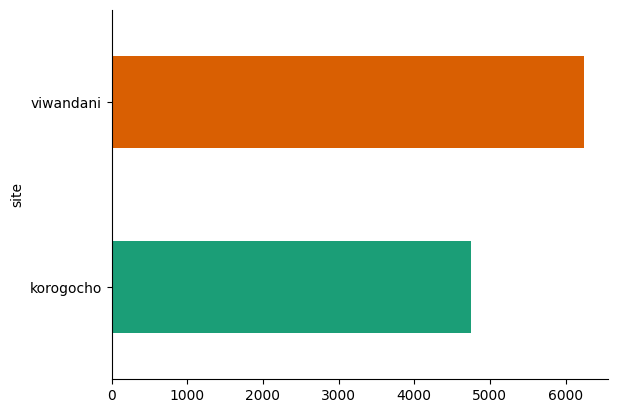

In [25]:
data.groupby('site').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### Distribution of Ethnicity

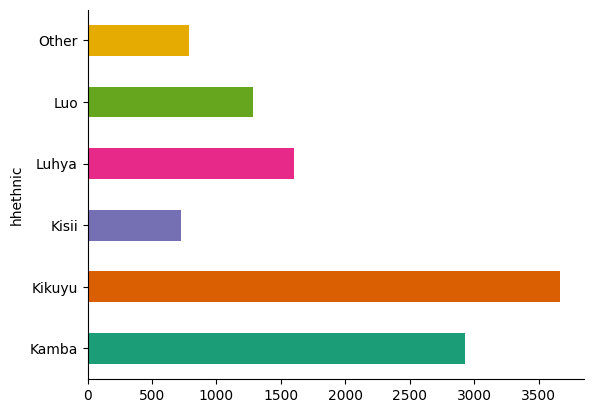

In [26]:
data.groupby('hhethnic').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### Food Security Score Distribution



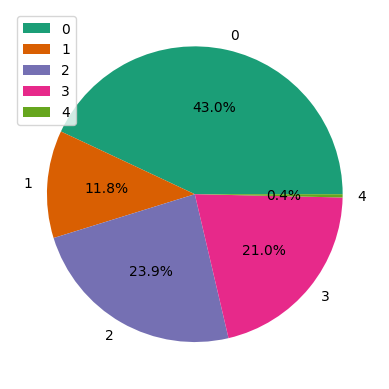

In [27]:
data.groupby('FS_score').size().plot(kind='pie', autopct='%1.1f%%', colors=sns.palettes.mpl_palette('Dark2'))
plt.legend(loc='upper left')
plt.gca().spines[['top', 'right',]].set_visible(False)

### Observations
- The pie chart shows that the food security score is low, indicating that
the food security is at a good level.
- The FS_score of 4 is underrepresented (0.4% of the data): This suggests the need for handling imbalance

## Data Preprocessing

### Drop Unnecessary Columns

In [28]:
data.drop(['ID','FS'], axis=1, inplace=True)
data.head()

,site,hhedu,hhhage,hhhsex,hhethnic,hhsize,u05,povline,windex3,windex5,FS_score
0,viwandani,primary,18,female,Other,6,1,yes,middle,fourth,0
1,viwandani,primary,31,male,Other,1,0,yes,lowest,lowest,3
2,viwandani,primary,45,male,Other,1,0,no_(2),highest,fourth,0
3,viwandani,secondary,18,male,Other,1,0,no_(2),middle,second,1
4,korogocho,secondary,58,male,Other,2,1,no_(2),highest,fourth,0


### Data Cleaning

In [29]:
# Ensure consistency in 'povline'
data['povline'] = data['povline'].replace({'no_(2)': 'no'})
data.head()

,site,hhedu,hhhage,hhhsex,hhethnic,hhsize,u05,povline,windex3,windex5,FS_score
0,viwandani,primary,18,female,Other,6,1,yes,middle,fourth,0
1,viwandani,primary,31,male,Other,1,0,yes,lowest,lowest,3
2,viwandani,primary,45,male,Other,1,0,no,highest,fourth,0
3,viwandani,secondary,18,male,Other,1,0,no,middle,second,1
4,korogocho,secondary,58,male,Other,2,1,no,highest,fourth,0


### Handling Missing Values

In [31]:
# Fill missing 'hhedu' with mode
data['hhedu'] = data['hhedu'].fillna(data['hhedu'].mode()[0])
data['hhedu'].isnull().sum()

np.int64(0)

## Data Encoding

### Ordinal Encoding
Ordinal Encoding the following columns to preserve ordering:
- hhedu
- windex3
- windex5

In [32]:
ordinal_columns = ['hhedu', 'windex3', 'windex5']
ordinal_encoder = OrdinalEncoder()
data[ordinal_columns] = ordinal_encoder.fit_transform(data[ordinal_columns])
data.head()

,site,hhedu,hhhage,hhhsex,hhethnic,hhsize,u05,povline,windex3,windex5,FS_score
0,viwandani,2.0,18,female,Other,6,1,yes,2.0,0.0,0
1,viwandani,2.0,31,male,Other,1,0,yes,1.0,2.0,3
2,viwandani,2.0,45,male,Other,1,0,no,0.0,0.0,0
3,viwandani,3.0,18,male,Other,1,0,no,2.0,4.0,1
4,korogocho,3.0,58,male,Other,2,1,no,0.0,0.0,0


### One-Hot Encoding
Applied to other textual/nominal columns

In [35]:
categorical_columns = data.select_dtypes(include='object').columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
data.head()

,hhedu,hhhage,hhsize,u05,windex3,windex5,FS_score,site_viwandani,hhhsex_male,hhethnic_Kikuyu,hhethnic_Kisii,hhethnic_Luhya,hhethnic_Luo,hhethnic_Other,povline_yes
0,2.0,18,6,1,2.0,0.0,0,True,False,False,False,False,False,True,True
1,2.0,31,1,0,1.0,2.0,3,True,True,False,False,False,False,True,True
2,2.0,45,1,0,0.0,0.0,0,True,True,False,False,False,False,True,False
3,3.0,18,1,0,2.0,4.0,1,True,True,False,False,False,False,True,False
4,3.0,58,2,1,0.0,0.0,0,False,True,False,False,False,False,True,False


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10991 entries, 0 to 10990
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hhedu            10991 non-null  float64
 1   hhhage           10991 non-null  int64  
 2   hhsize           10991 non-null  int64  
 3   u05              10991 non-null  int64  
 4   windex3          10991 non-null  float64
 5   windex5          10991 non-null  float64
 6   FS_score         10991 non-null  int64  
 7   site_viwandani   10991 non-null  bool   
 8   hhhsex_male      10991 non-null  bool   
 9   hhethnic_Kikuyu  10991 non-null  bool   
 10  hhethnic_Kisii   10991 non-null  bool   
 11  hhethnic_Luhya   10991 non-null  bool   
 12  hhethnic_Luo     10991 non-null  bool   
 13  hhethnic_Other   10991 non-null  bool   
 14  povline_yes      10991 non-null  bool   
dtypes: bool(8), float64(3), int64(4)
memory usage: 687.1 KB


## Feature Engineering

### Creating 'Dependency Ratio'
This may give insights into how many dependents under 5 years a household supports

In [37]:
data['dependency_ratio'] = data['u05'] / data['hhsize']
data['dependency_ratio']

,dependency_ratio
0,0.166667
1,0.000000
2,0.000000
3,0.000000
4,0.500000
...,...
10986,0.333333
10987,0.400000
10988,0.000000
10989,0.000000


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10991 entries, 0 to 10990
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hhedu             10991 non-null  float64
 1   hhhage            10991 non-null  int64  
 2   hhsize            10991 non-null  int64  
 3   u05               10991 non-null  int64  
 4   windex3           10991 non-null  float64
 5   windex5           10991 non-null  float64
 6   FS_score          10991 non-null  int64  
 7   site_viwandani    10991 non-null  bool   
 8   hhhsex_male       10991 non-null  bool   
 9   hhethnic_Kikuyu   10991 non-null  bool   
 10  hhethnic_Kisii    10991 non-null  bool   
 11  hhethnic_Luhya    10991 non-null  bool   
 12  hhethnic_Luo      10991 non-null  bool   
 13  hhethnic_Other    10991 non-null  bool   
 14  povline_yes       10991 non-null  bool   
 15  dependency_ratio  10991 non-null  float64
dtypes: bool(8), float64(4), int64(4)
memory 

## Obtaining the Features and Label


In [39]:
X = data.drop('FS_score', axis=1)
y = data['FS_score']
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (10991, 15)
y shape: (10991,)


### Distribution of Target

In [41]:
y.value_counts()

,count
FS_score,
0,4729
2,2624
3,2306
1,1293
4,39


## Resampling using SMOTE

In [103]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print(f"X_resampled shape: {X_resampled.shape}")
print(f"y_resampled shape: {y_resampled.shape}")

X_resampled shape: (23645, 15)
y_resampled shape: (23645,)


## Splitting into Training and Testing

In [104]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled,
    y_resampled,
    stratify=y_resampled,
    test_size=0.2,
    random_state=42
)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (18916, 15)
X_test shape: (4729, 15)
y_train shape: (18916,)
y_test shape: (4729,)


## Data Scaling

### Standard Scaling

In [105]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Results after Standard Scaling

In [106]:
X_train_scaled

array([[-0.09968078,  1.45671427, -0.18948819, ..., -0.32627849,
         0.87259974, -0.72188741],
       [ 0.43447196, -0.65544949, -1.16363102, ..., -0.32627849,
        -1.1460008 , -0.72188741],
       [ 0.97243185, -0.81792362, -0.6765596 , ..., -0.32627849,
         0.87259974, -0.72188741],
       ...,
       [-0.51345745,  0.48186946,  1.75879747, ..., -0.32627849,
         0.87259974, -0.72188741],
       [ 0.97243185,  0.40063239,  0.29758323, ..., -0.32627849,
         0.87259974,  1.04813816],
       [ 0.91384106,  1.05052893,  0.29758323, ..., -0.32627849,
         0.87259974, -0.72188741]])

In [107]:
X_test_scaled

array([[-0.25526696, -1.30534603, -0.6765596 , ..., -0.32627849,
        -1.1460008 , -0.72188741],
       [ 0.97243185, -1.3865831 , -1.16363102, ..., -0.32627849,
        -1.1460008 , -0.72188741],
       [ 0.97243185, -0.98039776, -0.6765596 , ..., -0.32627849,
        -1.1460008 , -0.72188741],
       ...,
       [ 0.97243185, -0.65544949, -0.6765596 , ..., -0.32627849,
         0.87259974, -0.72188741],
       [-1.2995671 ,  1.21300307,  1.27172606, ..., -0.32627849,
         0.87259974,  0.36894565],
       [ 0.856605  , -0.00555295,  0.29758323, ...,  3.06486649,
         0.87259974,  0.58375256]])

## Model Training and Evaluation


### Decision Tree Classifier

#### Finding the Best Parameters

In [108]:
# Finding the best parameters using GridSearchCV
decision_tree = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 10, 25],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(decision_tree, param_grid, cv=5, scoring='f1_weighted')
grid.fit(X_train_scaled, y_train)
print(f"Best Parameters: {grid.best_params_}")

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


#### Building with Best Parameters

In [124]:
# Build the decision tree classifier based on the best parameters
decision_tree = DecisionTreeClassifier(**grid.best_params_)
decision_tree.fit(X_train_scaled, y_train)

# Evaluate the decision tree classifier
y_pred_decision_tree = decision_tree.predict(X_test_scaled)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print(classification_report(y_test, y_pred_decision_tree))

              precision    recall  f1-score   support

           0       0.45      0.44      0.44       946
           1       0.60      0.63      0.62       945
           2       0.51      0.49      0.50       946
           3       0.57      0.57      0.57       946
           4       0.97      0.99      0.98       946

    accuracy                           0.62      4729
   macro avg       0.62      0.62      0.62      4729
weighted avg       0.62      0.62      0.62      4729



#### Decision Tree Classifier Confusion Matrix

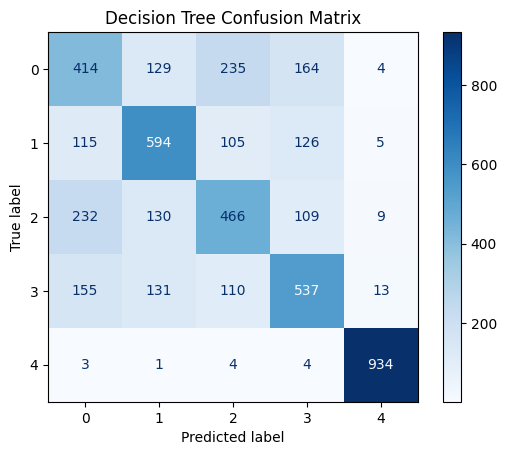

In [125]:
disp = ConfusionMatrixDisplay.from_estimator(
    decision_tree,
    X_test_scaled,
    y_test,
    display_labels=decision_tree.classes_,
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title("Decision Tree Confusion Matrix")
plt.show()

#### Decision Tree Feature Importance

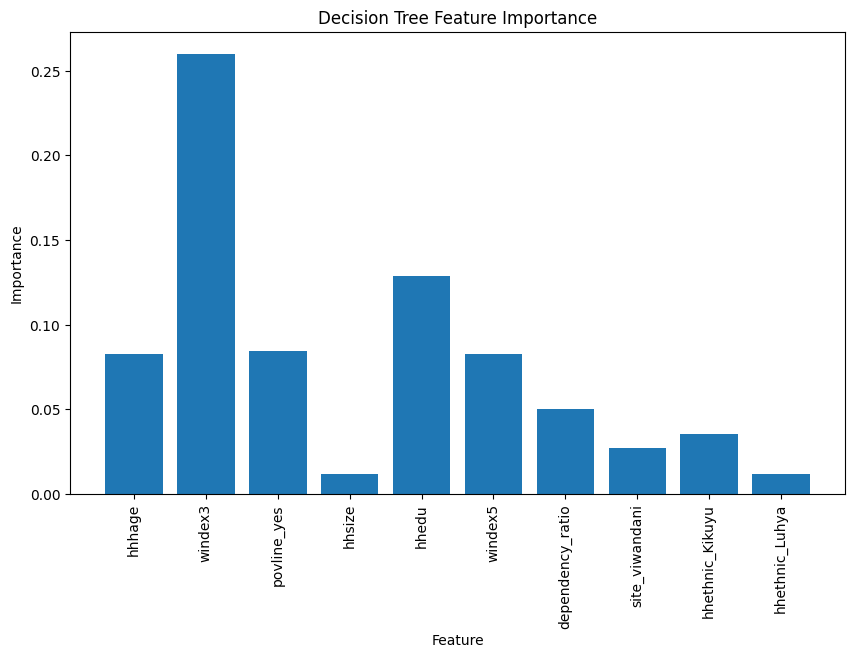

In [80]:
importances = decision_tree.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

n = 10

plt.figure(figsize=(10, 6))
plt.title("Decision Tree Feature Importance")
plt.bar(range(n), importances[:n], align="center")
plt.xticks(range(n), [features[i] for i in indices[:n]], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

### Random Forest Classifier

#### Finding the Best Parameters

In [117]:
# Finding the best parameters using RandomizedSearchCV
random_forest = RandomForestClassifier(random_state=42)
param_dist = {
    'n_estimators': randint(50, 1000),
    'max_depth': randint(5, 15),
    'min_samples_split': randint(2, 25),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}

rand_search = RandomizedSearchCV(random_forest, param_dist, n_iter=5, cv=5)
rand_search.fit(X_train_scaled, y_train)
print(f"Best Parameters: {rand_search.best_params_}")

Best Parameters: {'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 796}


#### Building the Random Forest with Best Parameters

In [120]:
random_forest = RandomForestClassifier(**rand_search.best_params_)
random_forest.fit(X_train_scaled, y_train)

# Evaluate the random forest classifier
y_pred_random_forest = random_forest.predict(X_test_scaled)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print(classification_report(y_test, y_pred_random_forest))

              precision    recall  f1-score   support

           0       0.52      0.45      0.48       946
           1       0.62      0.61      0.62       945
           2       0.53      0.54      0.54       946
           3       0.58      0.62      0.60       946
           4       0.94      1.00      0.97       946

    accuracy                           0.64      4729
   macro avg       0.64      0.64      0.64      4729
weighted avg       0.64      0.64      0.64      4729



#### Random Forest Confusion Matrix

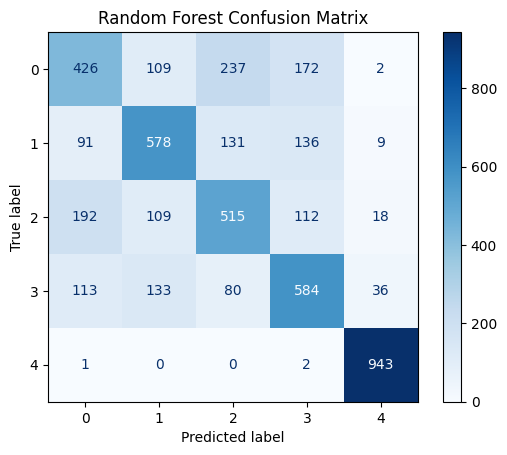

In [121]:
disp = ConfusionMatrixDisplay.from_estimator(
    random_forest,
    X_test_scaled,
    y_test,
    display_labels=random_forest.classes_,
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title("Random Forest Confusion Matrix")
plt.show()

#### Random Forest Feature Importance

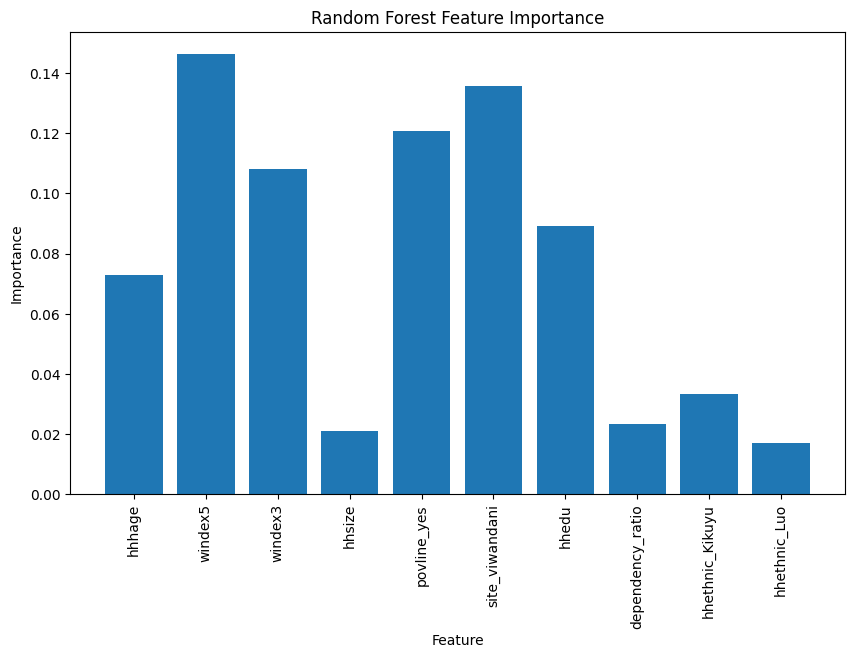

In [126]:
importances = random_forest.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

n = 10

plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importance")
plt.bar(range(n), importances[:n], align="center")
plt.xticks(range(n), [features[i] for i in indices[:n]], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()